✅ Objective:

To analyze historical join and exit patterns over time, segmented by job roles and regions, enabling forecasting of headcount needs and smarter workforce allocation.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = r"D:\DATASCIENCE AND AI\ANALYTICS\internship\mark 5\cleaned dataset full\cleaned3.csv"
df = pd.read_csv(file_path)

# Convert StartDate and ExitDate to datetime
df['StartDate'] = pd.to_datetime(df['StartDate'], errors='coerce')
df['ExitDate'] = pd.to_datetime(df['ExitDate'], errors='coerce')

# Extract Year-Month for grouping
df['JoinMonth'] = df['StartDate'].dt.to_period('M').astype(str)
df['ExitMonth'] = df['ExitDate'].dt.to_period('M').astype(str)


C:\Users\alanm\AppData\Local\Temp\ipykernel_20848\3699112090.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['ExitDate'] = pd.to_datetime(df['ExitDate'], errors='coerce')


Hiring Trend Over Time

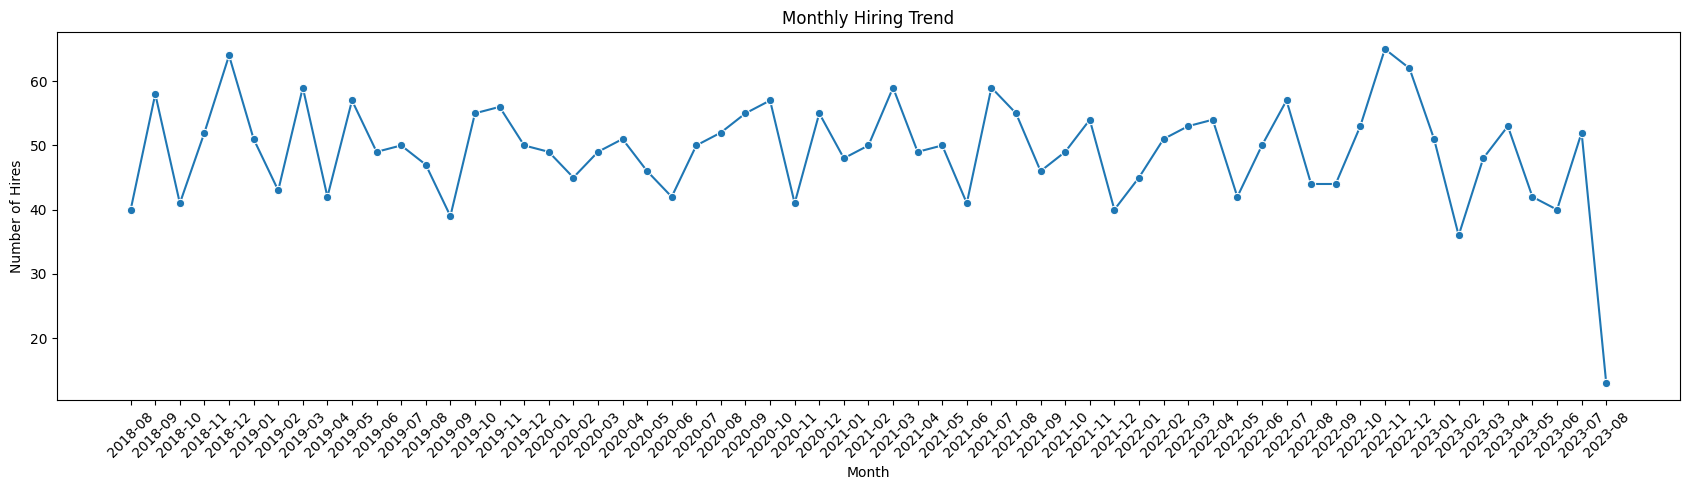

In [3]:
# Count monthly hires
join_trend = df['JoinMonth'].value_counts().sort_index()

plt.figure(figsize=(17, 5))
sns.lineplot(x=join_trend.index, y=join_trend.values, marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Hiring Trend")
plt.xlabel("Month")
plt.ylabel("Number of Hires")
plt.tight_layout()
plt.show()


Exit Trend Over Time

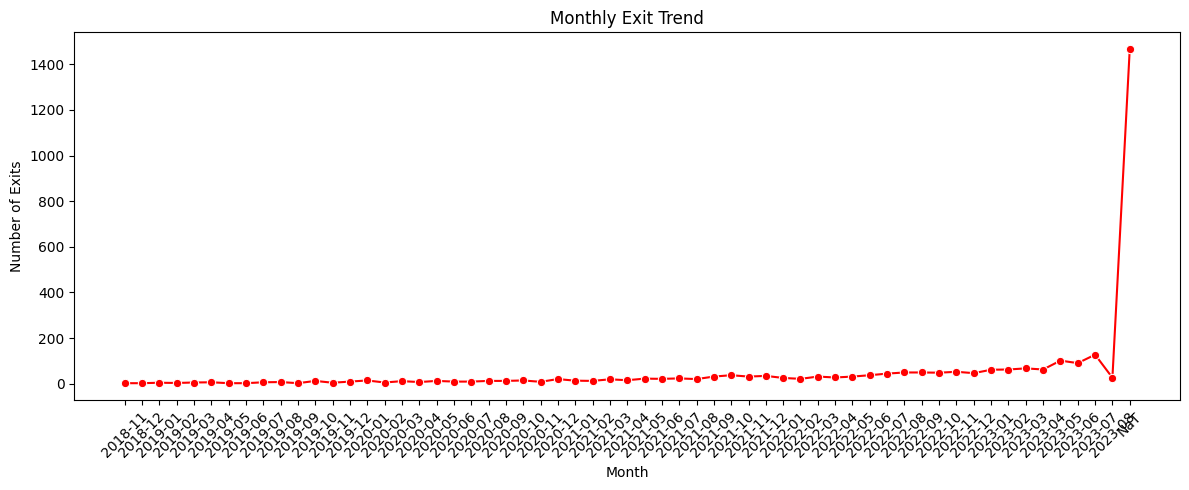

In [4]:
# Count monthly exits
exit_trend = df['ExitMonth'].dropna().value_counts().sort_index()

plt.figure(figsize=(12, 5))
sns.lineplot(x=exit_trend.index, y=exit_trend.values, color='red', marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Exit Trend")
plt.xlabel("Month")
plt.ylabel("Number of Exits")
plt.tight_layout()
plt.show()


Net Headcount Flow (Join - Exit)

In [5]:
# Create combined headcount flow dataframe
headcount_df = pd.DataFrame({
    'Hires': join_trend,
    'Exits': exit_trend
}).fillna(0)

headcount_df['NetChange'] = headcount_df['Hires'] - headcount_df['Exits']

# Plot Net Headcount Change
plt.figure(figsize=(12, 5))
sns.barplot(x=headcount_df.index, y=headcount_df['NetChange'], palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Monthly Net Headcount Change")
plt.xlabel("Month")
plt.ylabel("Net Change (Hires - Exits)")
plt.tight_layout()
plt.show()


C:\Users\alanm\AppData\Local\Temp\ipykernel_20848\2712249317.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=headcount_df.index, y=headcount_df['NetChange'], palette='coolwarm')


Hiring by BusinessUnit / JobFamily / Region

C:\Users\alanm\AppData\Local\Temp\ipykernel_20848\3430899921.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='JobFamily', palette='Set3')


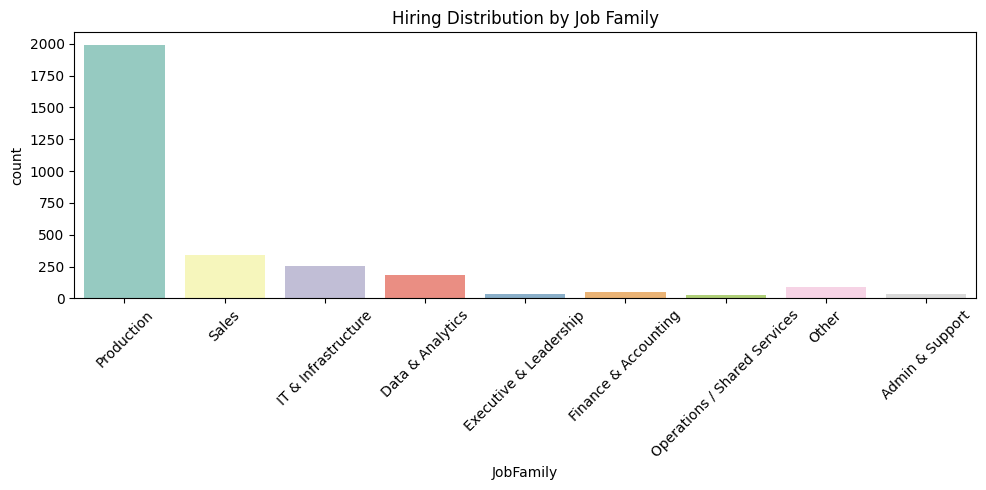

C:\Users\alanm\AppData\Local\Temp\ipykernel_20848\3430899921.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Region', palette='Set2')


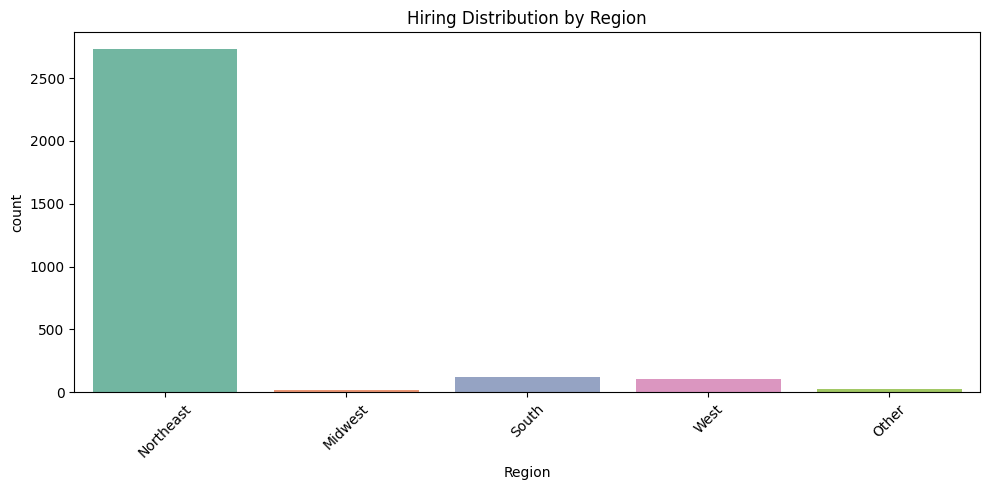

C:\Users\alanm\AppData\Local\Temp\ipykernel_20848\3430899921.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='BusinessUnit', palette='Set1')


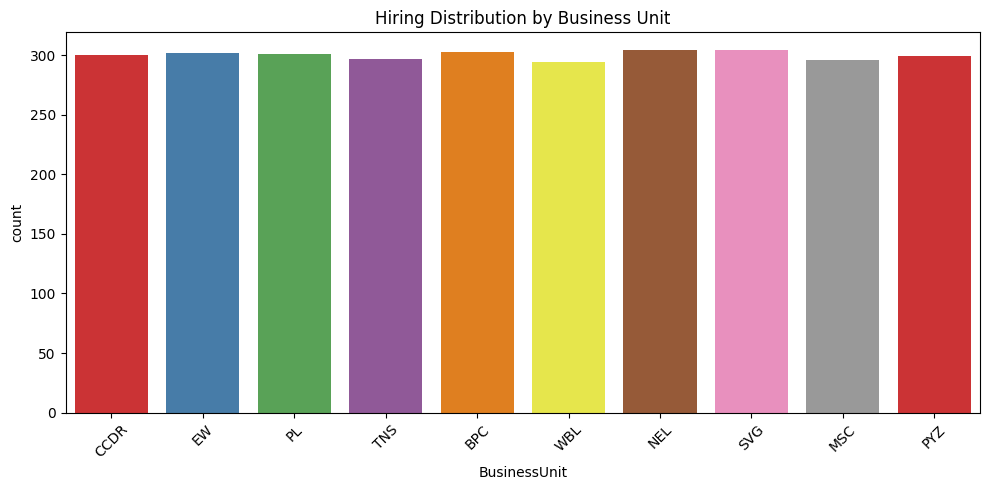

In [6]:
# Hiring by JobFamily
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='JobFamily', palette='Set3')
plt.title("Hiring Distribution by Job Family")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Hiring by Region
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Region', palette='Set2')
plt.title("Hiring Distribution by Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Hiring by BusinessUnit
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='BusinessUnit', palette='Set1')
plt.title("Hiring Distribution by Business Unit")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


✅ Optional: Projected Headcount Estimation

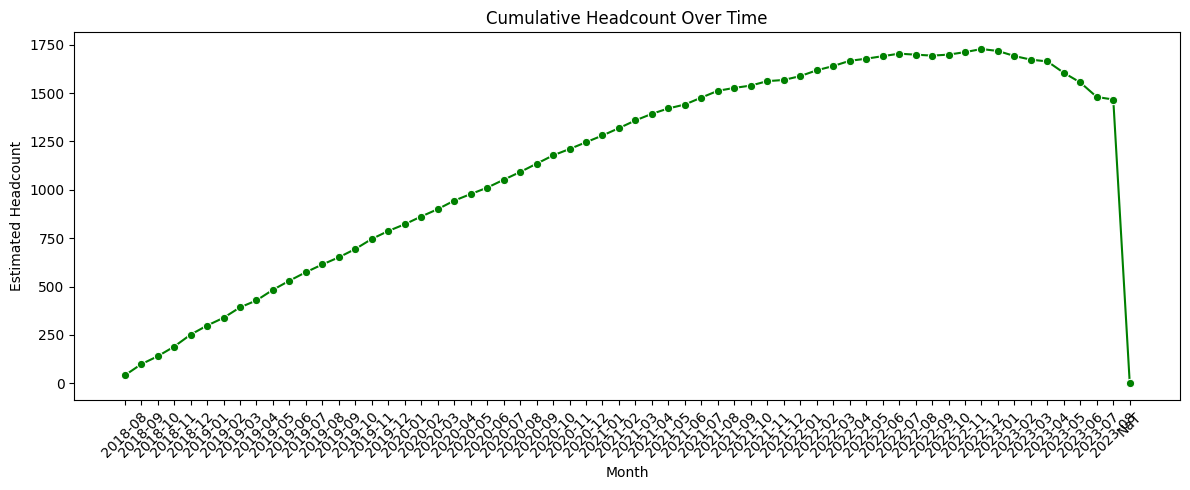

In [7]:
# Cumulative net headcount over time
headcount_df['CumulativeHeadcount'] = headcount_df['NetChange'].cumsum()

plt.figure(figsize=(12, 5))
sns.lineplot(x=headcount_df.index, y=headcount_df['CumulativeHeadcount'], marker='o', color='green')
plt.xticks(rotation=45)
plt.title("Cumulative Headcount Over Time")
plt.xlabel("Month")
plt.ylabel("Estimated Headcount")
plt.tight_layout()
plt.show()


📈 What We're Analyzing and Why

| Metric / View                    | Purpose                                         |
| -------------------------------- | ----------------------------------------------- |
| **Hiring Trend**                 | Visualize when and how hiring has changed       |
| **Exit Trend**                   | Track workforce losses and churn                |
| **Net Headcount Flow**           | Determine overall workforce growth or shrinkage |
| **Hiring by JobFamily / Region** | Identify focus areas for recruitment            |
| **Forecast Headcount**           | Plan future capacity based on historical trends |


| Purpose                         | Description                                                            |
| ------------------------------- | ---------------------------------------------------------------------- |
| **Forecast Talent Needs**       | Helps plan future hiring pipelines based on historical patterns        |
| **Optimize Hiring Strategy**    | Identifies which roles, regions, or units need proactive sourcing      |
| **Track Organizational Growth** | Monitors net workforce expansion or contraction over time              |
| **Manage Attrition Risk**       | Pinpoints high-exit periods or job families prone to churn             |
| **Strategic Budgeting**         | Informs HR and finance on how headcount affects compensation and costs |


📊 What We Analyzed and Why

| Metric / Feature                      | Why We Used It                                     |
| ------------------------------------- | -------------------------------------------------- |
| `StartDate` → `JoinMonth`             | To track hiring trends over time                   |
| `ExitDate` → `ExitMonth`              | To monitor attrition timing and seasonality        |
| `JobFamily`, `BusinessUnit`, `Region` | For role- and location-specific workforce planning |
| **Net Headcount Flow**                | To analyze actual workforce change (Hires - Exits) |
| **Cumulative Headcount**              | To estimate growth trends and future projections   |


📈 Graphs Used and Purpose

| Visualization                                           | Metric(s)                | Purpose                                           |
| ------------------------------------------------------- | ------------------------ | ------------------------------------------------- |
| `lineplot` – Monthly Hiring Trend                       | `JoinMonth`              | Detect hiring cycles and surges                   |
| `lineplot` – Monthly Exit Trend                         | `ExitMonth`              | Identify exit seasonality or spikes in attrition  |
| `barplot` – Net Change per Month                        | `Hires - Exits`          | Assess if headcount is growing or shrinking       |
| `lineplot` – Cumulative Headcount                       | Calculated over months   | Provide estimated headcount trend for forecasting |
| `countplot` – Hiring by JobFamily, Region, BusinessUnit | Group-wise hiring volume | Discover which areas are growing faster or slower |


🔍 Key Insights and Observations

- Hiring trends reveal seasonal peaks, often aligned with business cycles or recruitment drives.

- Exit trends highlight churn periods or departments with higher turnover.

- Net headcount change helps understand organizational growth or contraction over time.

- Cumulative headcount projection provides a rough estimate of workforce size, which can be extended into future forecasting models.

- Certain JobFamilies or Regions may be hiring more aggressively, indicating business expansion or high turnover replacement needs.

💼 Business Value:

| Value                            | Benefit to Organization                                |
| -------------------------------- | ------------------------------------------------------ |
| **Proactive Workforce Planning** | Aligns hiring with future demand and budget            |
| **Churn Risk Alerts**            | Guides intervention in high-attrition departments      |
| **Headcount Budgeting**          | Informs payroll and staffing projections for finance   |
| **Regional Talent Allocation**   | Ensures the right people are hired in the right places |
| **Leadership Forecasting**       | Helps in long-term planning for growing business units |


✅ Using 'StartDate' as Hire Date column.
✅ Using 'TerminationDescription' as Exit Date column.


C:\Users\alanm\AppData\Local\Temp\ipykernel_6068\2228111738.py:40: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[exit_col] = pd.to_datetime(df[exit_col], errors='coerce')
C:\Users\alanm\AppData\Local\Temp\ipykernel_6068\2228111738.py:48: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ).fillna(0)
C:\Users\alanm\AppData\Local\Temp\ipykernel_6068\2228111738.py:49: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  monthly[

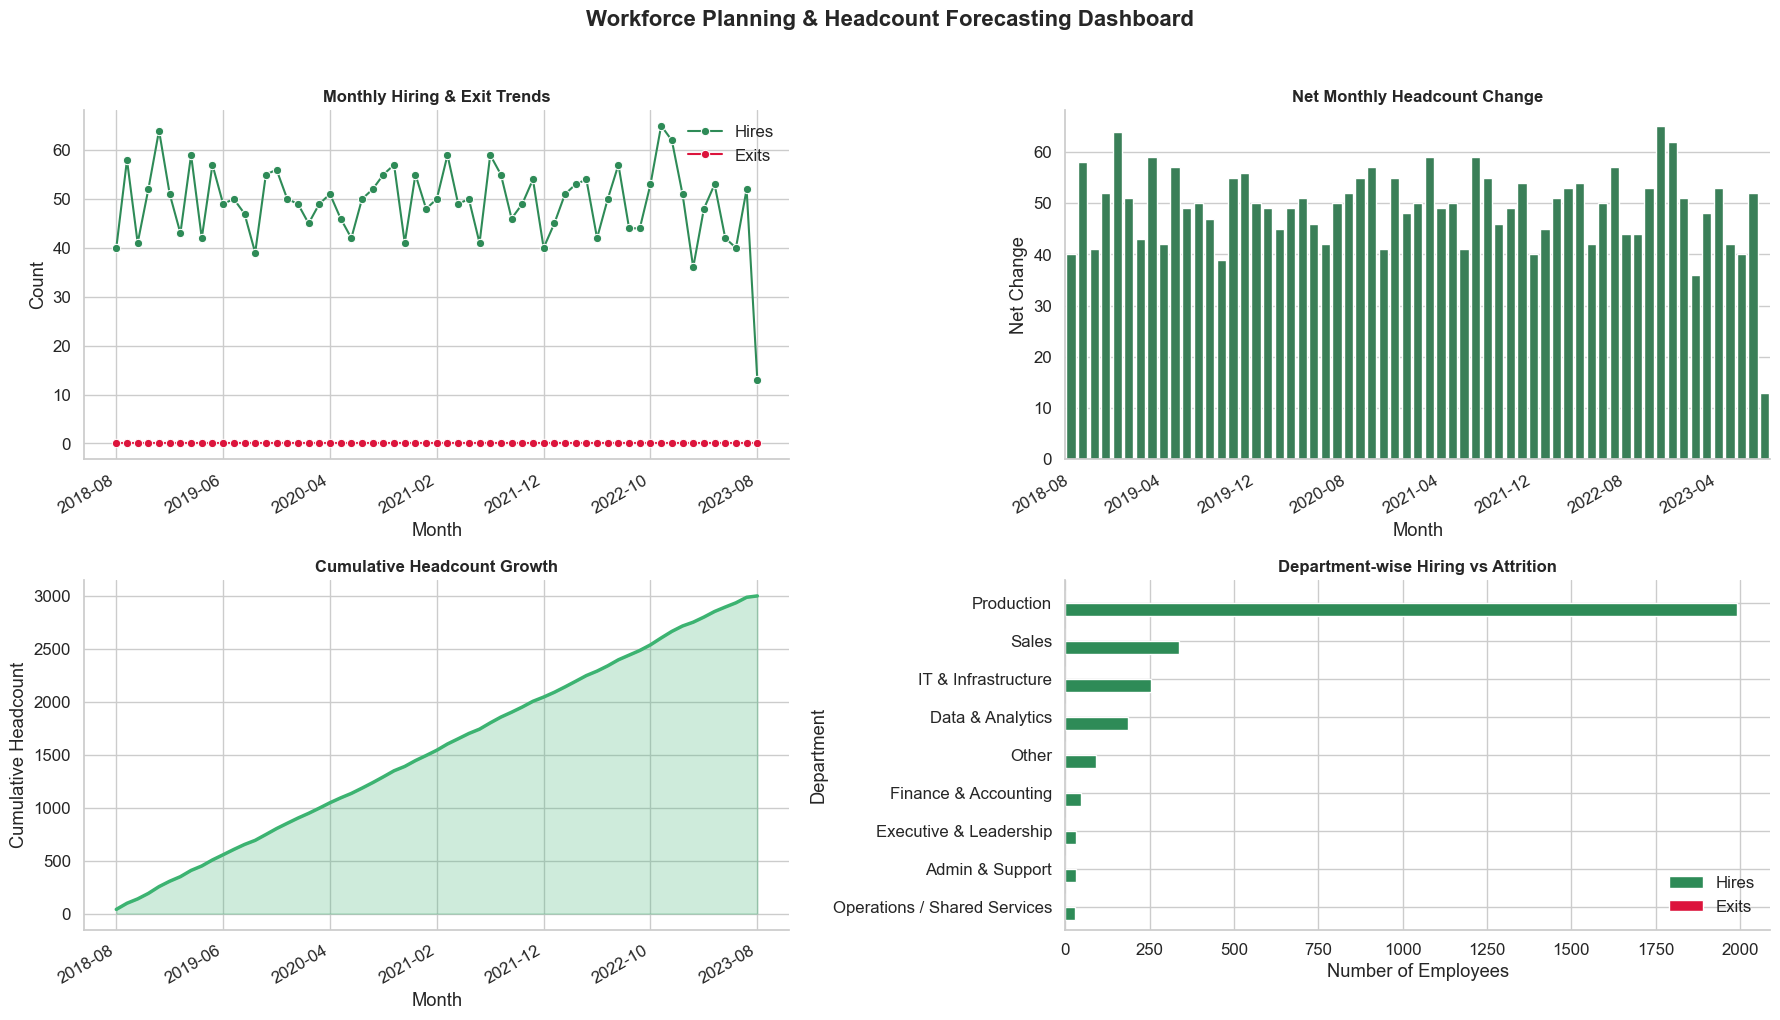

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

# Load dataset
file_path = r"D:\DATASCIENCE AND AI\ANALYTICS\internship\mark 5\cleaned dataset full\cleaned3.csv"
df = pd.read_csv(file_path)

# -------------------------------
# 1️⃣ AUTO-DETECT DATE COLUMNS
# -------------------------------
hire_col, exit_col = None, None
for col in df.columns:
    c = col.lower()
    if any(x in c for x in ["hire", "join", "start"]):
        hire_col = col
    if any(x in c for x in ["exit", "term", "resign", "leave"]):
        exit_col = col

if hire_col is None:
    raise ValueError("⚠️ Could not find a 'HireDate' or similar column in dataset.")

print(f"✅ Using '{hire_col}' as Hire Date column.")
if exit_col:
    print(f"✅ Using '{exit_col}' as Exit Date column.")
else:
    print("ℹ️ No Exit Date column found. Will visualize hires only.")

# -------------------------------
# 2️⃣ DATA PREPARATION
# -------------------------------
df[hire_col] = pd.to_datetime(df[hire_col], errors='coerce')
df = df.dropna(subset=[hire_col])

df['HireMonth'] = df[hire_col].dt.to_period('M')
hires_summary = df.groupby('HireMonth').size().reset_index(name='Hires')

if exit_col:
    df[exit_col] = pd.to_datetime(df[exit_col], errors='coerce')
    exits = df.dropna(subset=[exit_col]).copy()
    exits['ExitMonth'] = exits[exit_col].dt.to_period('M')
    exits_summary = exits.groupby('ExitMonth').size().reset_index(name='Exits')

    monthly = pd.merge(
        hires_summary, exits_summary,
        left_on='HireMonth', right_on='ExitMonth', how='outer'
    ).fillna(0)
    monthly['Month'] = monthly['HireMonth'].combine_first(monthly['ExitMonth'])
    monthly = monthly[['Month', 'Hires', 'Exits']]
else:
    monthly = hires_summary.rename(columns={'HireMonth': 'Month'})
    monthly['Exits'] = 0

# Convert Period to string and ensure numeric
monthly['Month'] = monthly['Month'].astype(str)
for col in ['Hires', 'Exits']:
    monthly[col] = pd.to_numeric(monthly[col], errors='coerce').fillna(0)

monthly['NetChange'] = monthly['Hires'] - monthly['Exits']
monthly = monthly.sort_values('Month')
monthly['Cumulative'] = monthly['NetChange'].cumsum()

# -------------------------------
# 3️⃣ VISUALIZATION DASHBOARD
# -------------------------------
sns.set_theme(style="whitegrid", font_scale=1.1)
plt.rcParams.update({
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.titlesize": 12,
    "axes.titleweight": "bold"
})

fig, axes = plt.subplots(2, 2, figsize=(18, 10))
fig.suptitle("Workforce Planning & Headcount Forecasting Dashboard", fontsize=16, fontweight='bold', y=1.02)

# --- 1. Monthly Hiring & Exit Trends ---
ax1 = axes[0, 0]
sns.lineplot(data=monthly, x='Month', y='Hires', label='Hires', color='#2E8B57', marker='o', ax=ax1)
sns.lineplot(data=monthly, x='Month', y='Exits', label='Exits', color='#DC143C', marker='o', ax=ax1)
ax1.set_title("Monthly Hiring & Exit Trends")
ax1.set_xlabel("Month")
ax1.set_ylabel("Count")
ax1.legend(frameon=False)
ax1.xaxis.set_major_locator(MaxNLocator(nbins=8))
for label in ax1.get_xticklabels():
    label.set_rotation(30)
    label.set_ha('right')

# --- 2. Net Monthly Headcount Change ---
ax2 = axes[0, 1]
palette = ['#2E8B57' if x >= 0 else '#DC143C' for x in monthly['NetChange']]
sns.barplot(data=monthly, x='Month', y='NetChange', palette=palette, ax=ax2)
ax2.axhline(0, color='black', linewidth=0.8)
ax2.set_title("Net Monthly Headcount Change")
ax2.set_xlabel("Month")
ax2.set_ylabel("Net Change")
ax2.xaxis.set_major_locator(MaxNLocator(nbins=8))
for label in ax2.get_xticklabels():
    label.set_rotation(30)
    label.set_ha('right')

# --- 3. Cumulative Headcount Growth ---
ax3 = axes[1, 0]
sns.lineplot(data=monthly, x='Month', y='Cumulative', color='#3CB371', linewidth=2.5, ax=ax3)
ax3.fill_between(monthly['Month'].astype(str), monthly['Cumulative'], color='#3CB371', alpha=0.25)
ax3.set_title("Cumulative Headcount Growth")
ax3.set_xlabel("Month")
ax3.set_ylabel("Cumulative Headcount")
ax3.xaxis.set_major_locator(MaxNLocator(nbins=8))
for label in ax3.get_xticklabels():
    label.set_rotation(30)
    label.set_ha('right')

# --- 4. Department-wise Hiring vs Attrition ---
ax4 = axes[1, 1]
dept_col = None
for col in df.columns:
    if any(x in col.lower() for x in ['jobfamily', 'department', 'function', 'division']):
        dept_col = col
        break

if dept_col:
    dept_summary = df.groupby(dept_col).size().reset_index(name='Hires')
    if exit_col:
        dept_exits = exits.groupby(dept_col).size().reset_index(name='Exits')
        dept_summary = pd.merge(dept_summary, dept_exits, on=dept_col, how='outer').fillna(0)
    else:
        dept_summary['Exits'] = 0

    dept_summary = dept_summary.sort_values('Hires', ascending=True)
    dept_summary.plot(kind='barh', x=dept_col, y=['Hires', 'Exits'],
                      color=['#2E8B57', '#DC143C'], ax=ax4, width=0.7)
    ax4.set_title("Department-wise Hiring vs Attrition")
    ax4.set_xlabel("Number of Employees")
    ax4.set_ylabel("Department")
    ax4.legend(frameon=False)
else:
    ax4.text(0.5, 0.5, "Department/Job Family data unavailable", ha='center', va='center', fontsize=12, color='gray')
    ax4.set_axis_off()

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()
